In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset 
data = pd.read_csv('DataSets/project1_df.csv')

In [10]:
# Display basic info about the dataset
print("Dataset Overview:")
print(data.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB
None


In [11]:
# Step 1: Handle Missing Values
data.fillna({
    col: 0 if data[col].dtype != 'object' else 'Unknown' for col in data.columns
}, inplace=True)


In [12]:
# Step 2: Check and Handle Outliers
# Example: Removing rows with Gross Amount > 99th percentile
q99 = data['Gross Amount'].quantile(0.99)
data = data[data['Gross Amount'] <= q99]

In [13]:
# Step 3: Convert 'Purchase Date' to datetime format
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], errors='coerce',dayfirst = True)

In [14]:
# Drop rows where 'Purchase Date' conversion failed
data.dropna(subset=['Purchase Date'], inplace=True)

In [15]:
# Step 4: Calculate Additional Fields
# 4.1: Discount Percentage
data['Discount Percentage'] = (data['Discount Amount (INR)'] / data['Gross Amount']) * 100

In [16]:
# 4.2: Revenue per Customer (aggregated by CID)
revenue_per_customer = data.groupby('CID')['Gross Amount'].sum().reset_index()
revenue_per_customer.rename(columns={'Gross Amount': 'Revenue per Customer'}, inplace=True)

In [17]:
# Merge Revenue per Customer back into the main dataset
data = data.merge(revenue_per_customer, on='CID', how='left')

In [18]:
# Step 5: Save the Cleaned Dataset
# Save to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)

In [19]:
print("Data preprocessing completed successfully!")

Data preprocessing completed successfully!


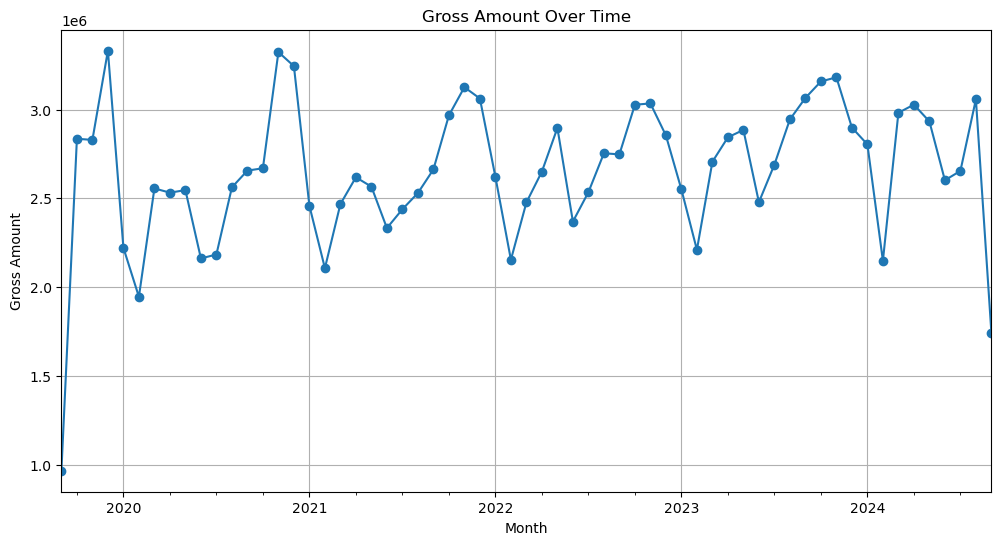

In [20]:
# Exploratory Data Analysis (EDA)
# 1. Trend Analysis: Gross Amount Over Time
plt.figure(figsize=(12, 6))
data.groupby(data['Purchase Date'].dt.to_period('M'))['Gross Amount'].sum().plot(kind='line', marker='o')
plt.title('Gross Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Gross Amount')
plt.grid(True)
plt.show()

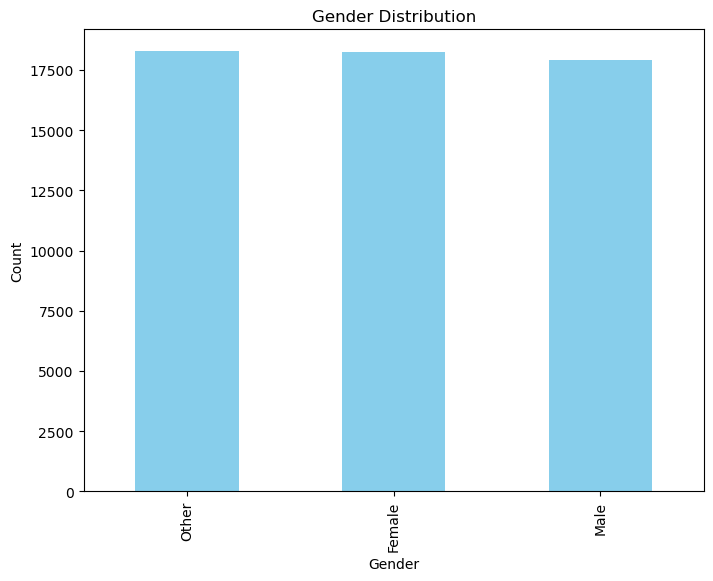

In [21]:
# 2. Customer Demographics: Gender Distribution
plt.figure(figsize=(8, 6))
data['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

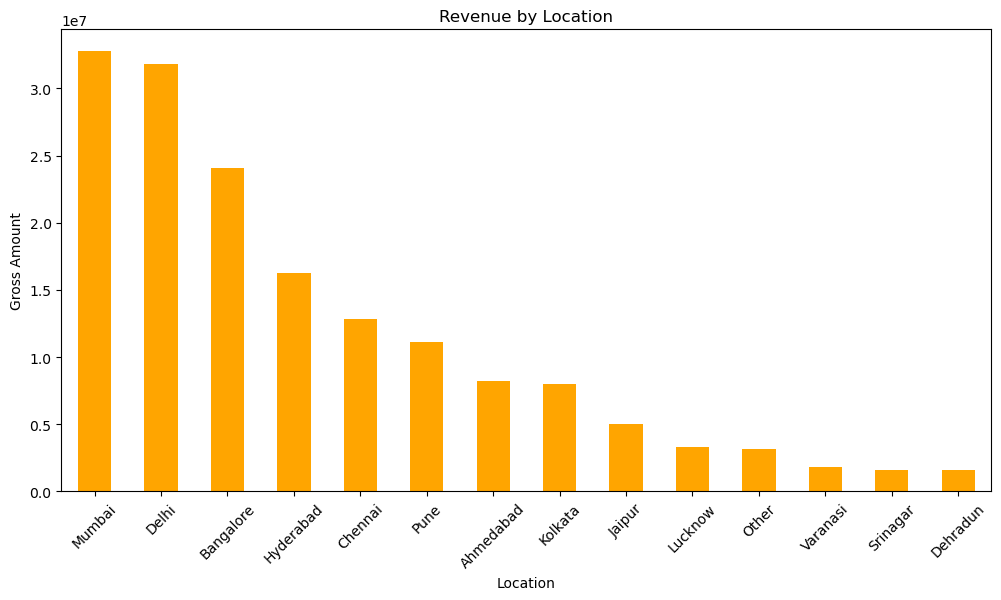

In [22]:
# 3. Revenue by Location
plt.figure(figsize=(12, 6))
data.groupby('Location')['Gross Amount'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Revenue by Location')
plt.xlabel('Location')
plt.ylabel('Gross Amount')
plt.xticks(rotation=45)
plt.show()

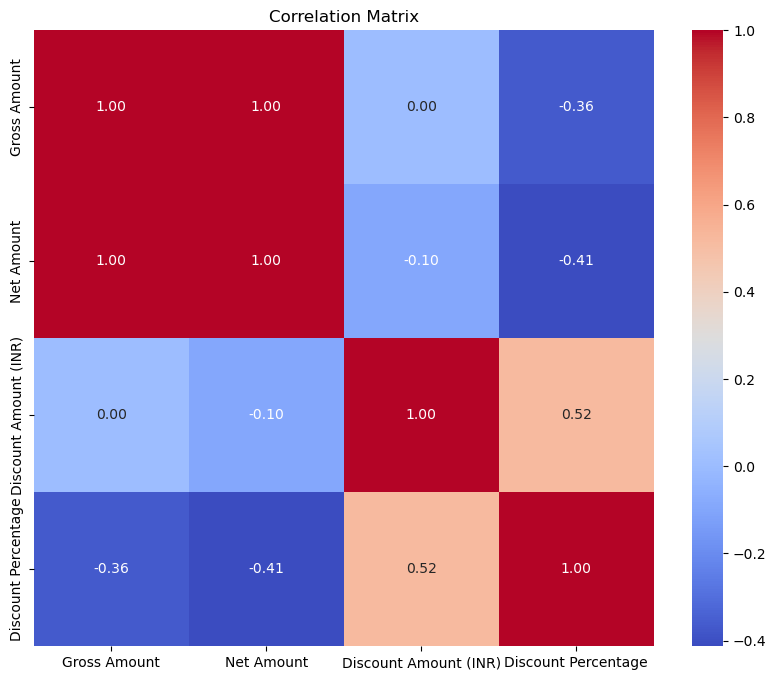

In [23]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = data[['Gross Amount', 'Net Amount', 'Discount Amount (INR)', 'Discount Percentage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

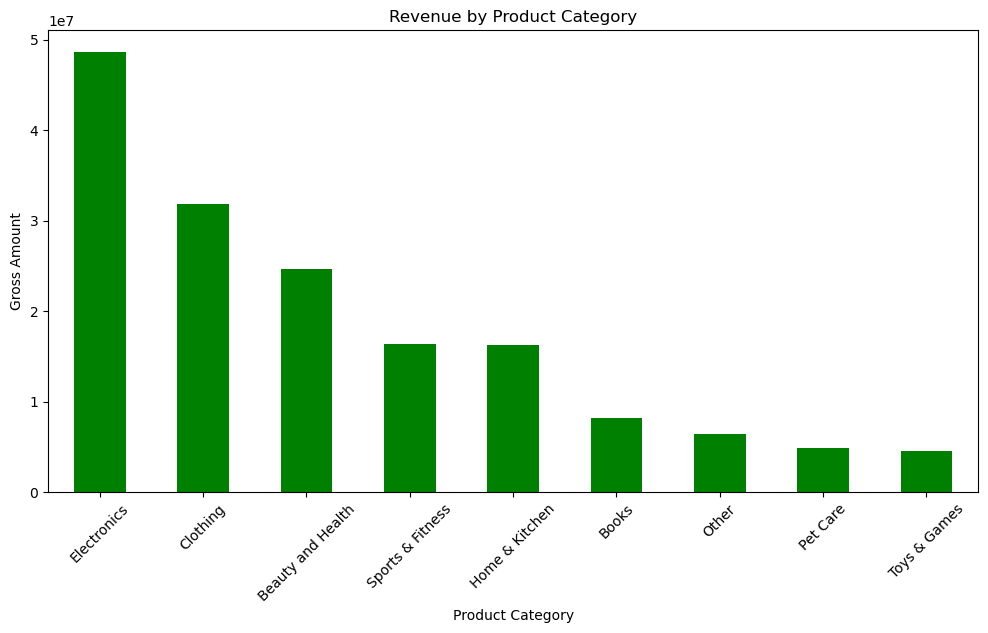

In [24]:
# 5. Revenue by Product Category
plt.figure(figsize=(12, 6))
data.groupby('Product Category')['Gross Amount'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gross Amount')
plt.xticks(rotation=45)
plt.show()

In [25]:
print("Enjoy! EDA completed successfully!")

Enjoy! EDA completed successfully!


Analyze the outcomes of the Data

In [47]:
# Top Age Group by Revenue
age_group_revenue = data.groupby('Age Group')['Gross Amount'].sum().sort_values(ascending=False)
print(age_group_revenue)

Age Group
25-45           6.517877e+07
18-25           4.785690e+07
45-60           3.236050e+07
under 18        8.220991e+06
60 and above    7.972737e+06
Name: Gross Amount, dtype: float64


In [49]:
# Top Locations by Revenue
location_revenue = data.groupby('Location')['Gross Amount'].sum().sort_values(ascending=False)
print(location_revenue)

Location
Mumbai       3.276491e+07
Delhi        3.183135e+07
Bangalore    2.410309e+07
Hyderabad    1.623936e+07
Chennai      1.282428e+07
Pune         1.111960e+07
Ahmedabad    8.214325e+06
Kolkata      8.006472e+06
Jaipur       4.982496e+06
Lucknow      3.338825e+06
Other        3.138572e+06
Varanasi     1.792493e+06
Srinagar     1.618156e+06
Dehradun     1.615984e+06
Name: Gross Amount, dtype: float64


In [51]:
# Top Discount by Revenue
discount_revenue = data.groupby('Discount Name')['Gross Amount'].sum().sort_values(ascending=False)
print(discount_revenue)

Discount Name
Unknown            8.108002e+07
NEWYEARS           2.393162e+07
SEASONALOFFER21    2.044998e+07
FESTIVE50          1.208710e+07
WELCOME5           1.206379e+07
SAVE10             1.197740e+07
Name: Gross Amount, dtype: float64
